# This file will serve as an analysis tool for efficiency comparisons.

In [1]:
# We will need these packages for visualization
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Here we will define some plotting functions
def plot_hashmap(hashmap_file, caps, lims):
    hashmap_data = pd.read_csv(hashmap_file)

    caps_data = []
    for cap in caps:
        caps_data.append(hashmap_data[hashmap_data['capacity'] == cap])

    plt.figure(figsize=(10, 5))
    for index, cap in enumerate(caps):
        plt.subplot(1, len(caps), index + 1)
        plt.title(f"Capacity {cap}")
        plt.xlabel('Threads')
        plt.ylabel('Runtime')
        for lim in lims:
            plt.plot('threads', 'runtime', data = caps_data[index][caps_data[index]['limit'] == lim])
        plt.legend(lims, loc='upper right')

    plt.tight_layout()
    plt.show()
    
def plot_stl_hashmap(hashmap_file, lims):
    hashmap_data = pd.read_csv(hashmap_file)
    
    plt.figure(figsize=(10, 5))
    plt.title('Variable Capacity')
    plt.xlabel('Insertions')
    plt.ylabel('Runtime')
    plt.plot('limit', 'runtime', data = hashmap_data)
    
def plot_linked_list(linked_list_file, lims):
    linked_list_data = pd.read_csv(linked_list_file)
    
    plt.figure(figsize=(10, 5))
    plt.title(linked_list_file)
    plt.xlabel('Threads')
    plt.ylabel('Runtime')
    for lim in lims:
        plt.plot('threads', 'runtime', data = linked_list_data[linked_list_data['limit'] == lim])
        
    plt.legend(lims, loc='upper right')
    plt.show()

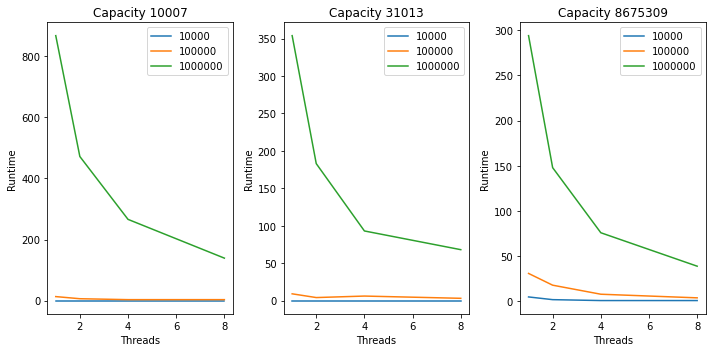

In [3]:
# Hashmap
caps = [10_007, 31_013, 8_675_309]
lims = [10_000, 100_000, 1_000_000]
plot_hashmap('data/hashmap.csv', caps, lims)

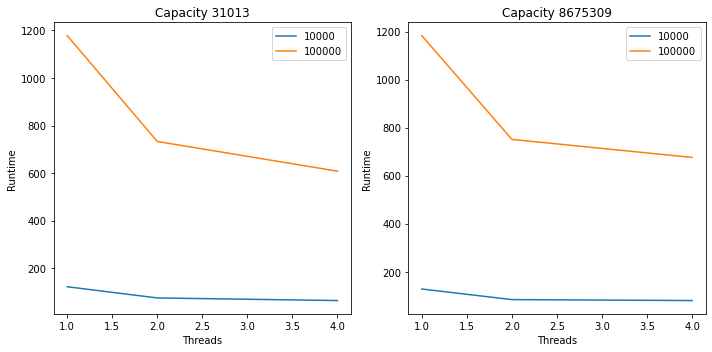

In [4]:
# Managed Hashmap
caps = [31_013, 8_675_309]
lims = [10_000, 100_000]
plot_hashmap('data/managed_hashmap.csv', caps, lims)

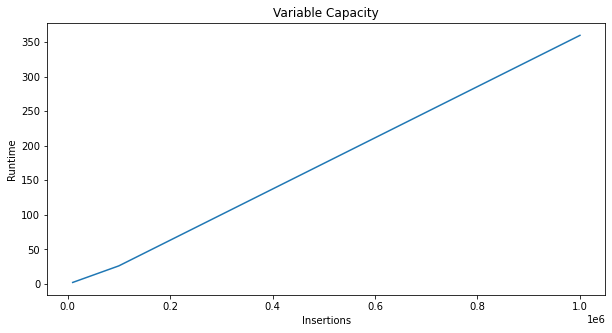

In [5]:
# STL Hashmap
lims = [10_000, 100_000, 1_000_000]
plot_stl_hashmap('data/stl_hashmap.csv', lims)

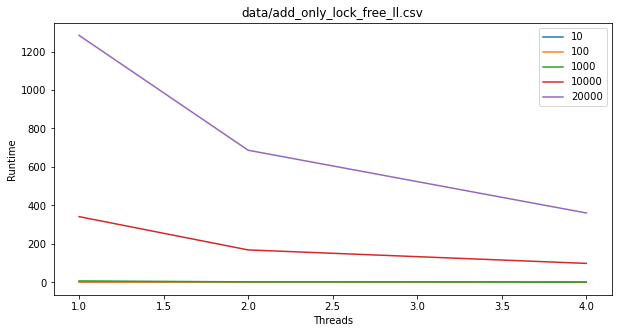

In [6]:
# Add Only Lock Free Linked List
lims = [10, 100, 1_000, 10_000, 20_000]
plot_linked_list('data/add_only_lock_free_ll.csv', lims)

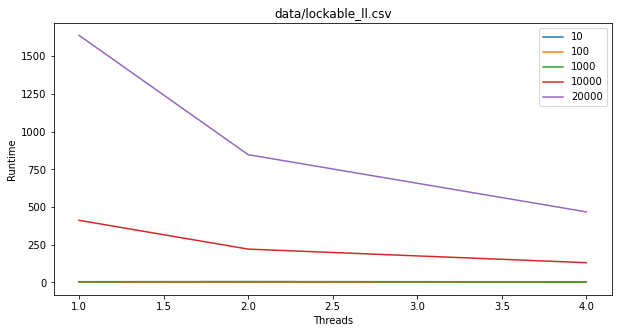

In [7]:
# Lockable Linked List
lims = [10, 100, 1_000, 10_000, 20_000]
plot_linked_list('data/lockable_ll.csv', lims)

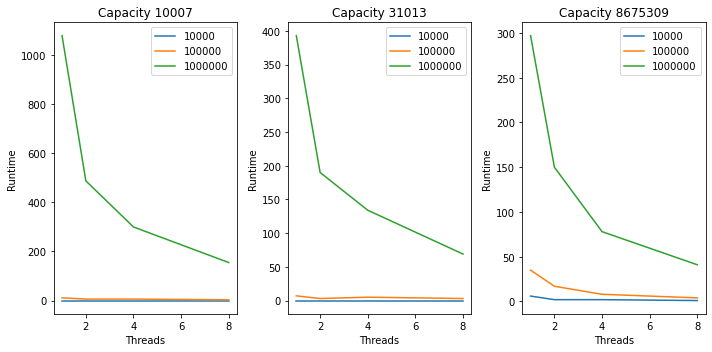

In [8]:
# Hashset
caps = [10_007, 31_013, 8_675_309]
lims = [10_000, 100_000, 1_000_000]
plot_hashmap('data/hashset.csv', caps, lims)